In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit,softmax
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired number of classes

In [20]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Number of classes to run classification on
Nclasses = 3
labelclasses = y < Nclasses
Xnew = X[labelclasses]
ynew = y[labelclasses]

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xnew, ynew], handle)


c:\Users\Adnane Ezouhri\Desktop\School\Machine_Learning\.venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data into training, testing and validation sets. The train set is used to train the model and the test set is used to evaluate the model. The validation set is used to tune the hyperparameters of the model.

In [4]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xnew, ynew = pickle.load(handle)



X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.125, random_state=1) # 0.25 x 0.8 = 0.2

# Setting the amount of features to be used
Nfeatures = X_train.shape[1]

# Transposing the training data matrices to fit the model
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T
    



# Linear MCC classifier

In [5]:
def testLinearMCClassifier(weights,features,labels):
    features_T= features.T
    misclassifications =0
    for i in range(features_T.shape[0]):
        biased_features = np.append(features_T[i],1)
        predict = np.dot(biased_features, weights.T)

        if predict.argmax() != labels[i]:
            misclassifications +=1

    return misclassifications
        

# Gaussian MCC classifier

In [27]:

def gaussianMultiChannelClassifier(training_features,training_labels, number_of_classes = Nclasses):
    
    
    
    # Despite transposing the training features previously,
    # this is a check to make sure the data is in the right format
    if training_features.shape[0] != len(training_labels):
        training_features = training_features.T


    number_of_features = training_features.shape[1]
    matrix_one = np.zeros((Nclasses,number_of_features+1))
    for i in range(number_of_classes):
        classiffication_features= training_features[training_labels==i, :]

        mu = np.mean(classiffication_features,axis=0)
        matrix_one[i,:-1] = mu
        matrix_one[i, -1] = -0.5 * np.dot(mu, mu)               

    return matrix_one
        

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
# a = gaussianMultiChannelClassifier(X_train,y_train)

# train = testLinearMCClassifier(a,X_train,y_train)
# val = testLinearMCClassifier(a,X_val,y_val)
# test = testLinearMCClassifier(a,X_test,y_test)
# print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
# print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
# print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")                  

Mis-classifications= 916 out of 15239 equivalent to 6.010893103221996 %
Mis-classifications= 127 out of 2177 equivalent to 5.833716123105191 %
Mis-classifications= 255 out of 4354 equivalent to 5.856683509416628 %


# Logistic Regression MCC

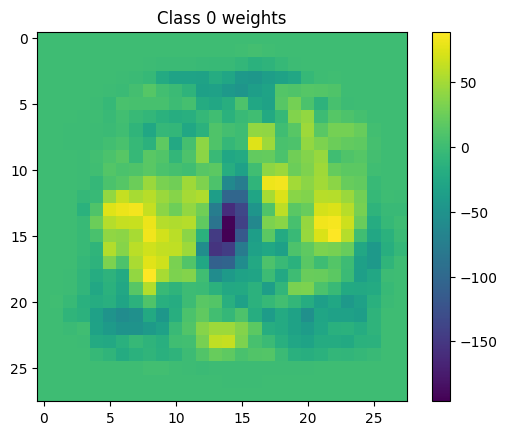

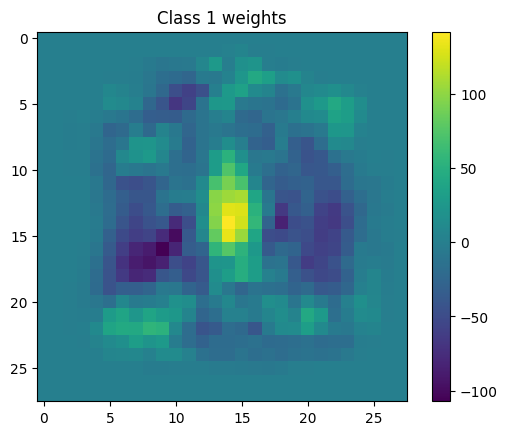

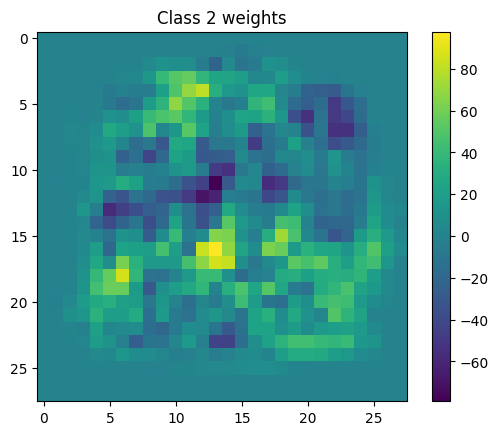

Mis-classifications= 141 out of 15239 equivalent to 0.9252575628322068 %
Mis-classifications= 38 out of 2177 equivalent to 1.7455213596692696 %
Mis-classifications= 53 out of 4354 equivalent to 1.2172714745062012 %


In [23]:

def logisticRegressionMultiClassClassifier(training_features,training_labels,iterations=100,step_size=1e-4,verbose=False):


    # Despite transposing the training features previously,
    # this is a check to make sure the data is in the right format
    if training_features.shape[0] != len(training_labels):
        training_features = training_features.T
    
    biased_training_features = np.hstack((training_features, np.zeros((training_features.shape[0], 1))))
    weights = 0.01*np.random.randn(Nclasses, biased_training_features.shape[1])

    for i in range(iterations):
        scores = np.dot(biased_training_features, weights.T)
        probabilities = softmax(scores, axis=1)

        one_hot_labels = np.eye(Nclasses)[training_labels]

        error = probabilities - one_hot_labels

        gradient = np.dot(biased_training_features.T, error)
        weights -= step_size * gradient.T

    
    return weights

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
# a = logisticRegressionMultiClassClassifier(X_train,y_train,iterations=500,verbose=False)
# for i in range(Nclasses):
#     weights = a[i, :-1]  # Exclude the bias term
#     plt.figure()
#     plt.imshow(weights.reshape(28, 28))
#     plt.title(f'Class {i} weights')
#     plt.colorbar()
#     plt.show()

# train = testLinearMCClassifier(a,X_train,y_train)
# val = testLinearMCClassifier(a,X_val,y_val)
# test = testLinearMCClassifier(a,X_test,y_test)
# print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
# print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
# print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")  


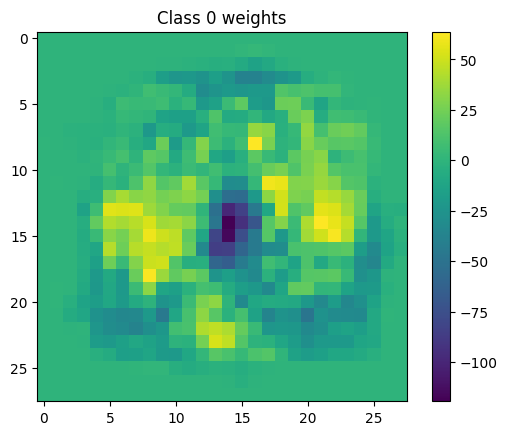

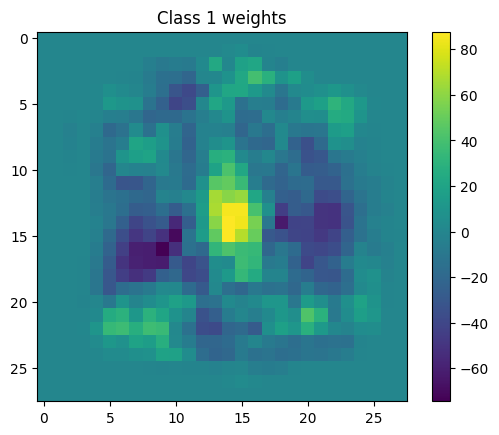

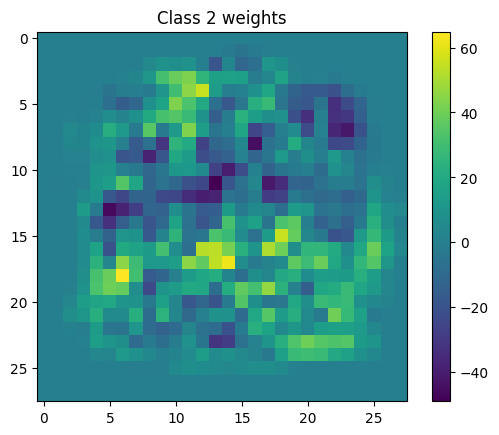

Mis-classifications= 142 out of 15239 equivalent to 0.9318196732069033 %
Mis-classifications= 37 out of 2177 equivalent to 1.6995865870463942 %
Mis-classifications= 59 out of 4354 equivalent to 1.3550757923748278 %


In [24]:

def logisticRegressionMultiClassClassifierWithRegularization(training_features,training_labels, classes_nb= Nclasses,iterations=100,step_size=1e-4,lam=0,verbose=False):
    
    # Despite transposing the training features previously,
    # this is a check to make sure the data is in the right format
    if training_features.shape[0] != len(training_labels):
        training_features = training_features.T
    
    biased_training_features = np.hstack((training_features, np.zeros((training_features.shape[0], 1))))
    weights = 0.01*np.random.randn(Nclasses, biased_training_features.shape[1])

    for i in range(iterations):
        scores = np.dot(biased_training_features, weights.T)
        probabilities = softmax(scores, axis=1)

        one_hot_labels = np.eye(Nclasses)[training_labels]

        error = probabilities - one_hot_labels

        gradient = np.dot(biased_training_features.T, error) + lam*weights.T
        
        weights -= step_size * gradient.T
    
    return weights


# a = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
# for i in range(Nclasses):
#     weights = a[i, :-1]  # Exclude the bias term
#     plt.figure()
#     plt.imshow(weights.reshape(28, 28))
#     plt.title(f'Class {i} weights')
#     plt.colorbar()
#     plt.show()

# train = testLinearMCClassifier(a,X_train,y_train)
# val = testLinearMCClassifier(a,X_val,y_val)
# test = testLinearMCClassifier(a,X_test,y_test)
# print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
# print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
# print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")  


C:\Users\Adnane Ezouhri\AppData\Local\Temp\ipykernel_15616\598023852.py:19: RuntimeWarning: overflow encountered in multiply
  gradient = np.dot(biased_training_features.T, error) + lam*weights.T


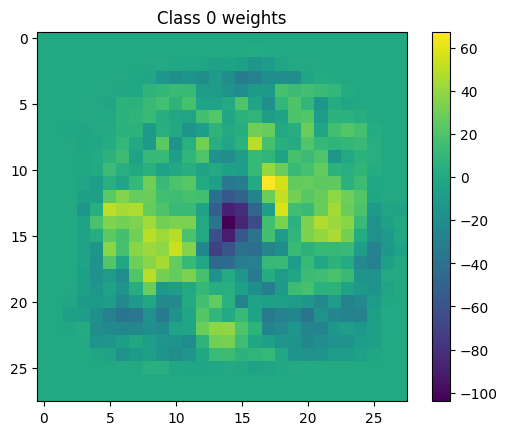

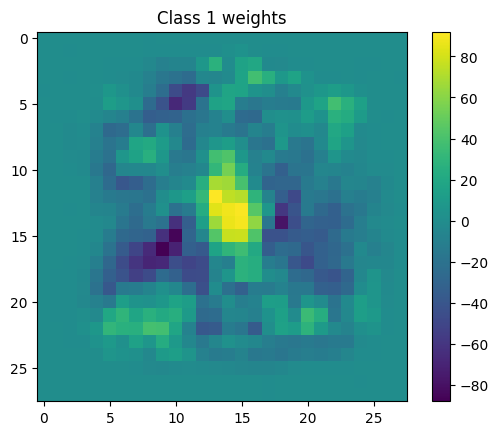

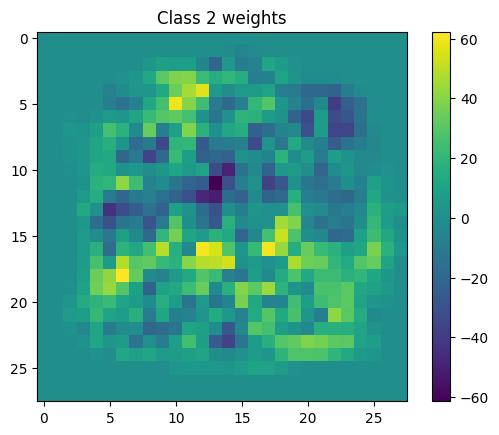

Mis-classifications= 88 out of 15239 equivalent to 0.5774657129732922 %
Mis-classifications= 36 out of 2177 equivalent to 1.6536518144235186 %
Mis-classifications= 61 out of 4354 equivalent to 1.4010105649977032 %


In [17]:
def Optimize_MC_Hyperparameters(training_features, training_labels, class_nb=Nclasses, min_lambda_init=1e-5, max_lambda_init=1e5, iterations=10, num_lambda_values=20):
    # YOUR CODE HERE
    min_lambda = min_lambda_init
    max_lambda = max_lambda_init

    optimal_lambda = None

    top_score= float('inf')
    top_weights= None

    for i in range(iterations):
        lam = np.logspace(np.log10(min_lambda), np.log10(max_lambda), num=num_lambda_values)
        for l in lam:
            weights = logisticRegressionMultiClassClassifierWithRegularization(training_features, training_labels, iterations=500, step_size=1e-4, lam=l, verbose=False)
            
            score = testLinearMCClassifier(weights, training_features, training_labels)

            if score < top_score:
                top_score = score
                top_weights = weights
                optimal_lambda = l
        
        min_lambda = optimal_lambda/10
        max_lambda = optimal_lambda*10

    return optimal_lambda, top_weights

# optimal_lambda, a = Optimize_MC_Hyperparameters(X_train,y_train)
# a = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam = a1)
# for i in range(Nclasses):
#     weights = a[i, :-1]  # Exclude the bias term
#     plt.figure()
#     plt.imshow(weights.reshape(28, 28))
#     plt.title(f'Class {i} weights')
#     plt.colorbar()
#     plt.show()


In [33]:
# Gaussian Multi-Channel Classifier 
print("Gaussian Multi-Channel Classifier Results:")
weights = gaussianMultiChannelClassifier(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Logistic Regression Multi-Channel Classifier
print("Logistic Regression Multi-Channel Classifier Results:")
weights = logisticRegressionMultiClassClassifier(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")
# Logistic Regression Multi-Channel Classifier with Regularization
print("Logistic Regression Multi-Channel Classifier with Regularization Results:")
weights = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Optimized Multi-Channel Hyperparameters
print("Optimized Multi-Channel Hyperparameters Results:")
optimal_lambda, weights = Optimize_MC_Hyperparameters(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")


Gaussian Multi-Channel Classifier Results:
Training missclassification : 916 out of 15239, representing 6.01%
Training missclassification : 127 out of 15239, representing 5.83%
Training missclassification : 255 out of 15239, representing 5.86%
---------------------------------------------------------------------------------------------------------------
Logistic Regression Multi-Channel Classifier Results:
Training missclassification : 217 out of 15239, representing 1.42%
Training missclassification : 34 out of 15239, representing 1.56%
Training missclassification : 79 out of 15239, representing 1.81%
---------------------------------------------------------------------------------------------------------------
Logistic Regression Multi-Channel Classifier with Regularization Results:
Training missclassification : 121 out of 15239, representing 0.79%
Training missclassification : 35 out of 15239, representing 1.61%
Training missclassification : 62 out of 15239, representing 1.42%
------

C:\Users\Adnane Ezouhri\AppData\Local\Temp\ipykernel_15616\598023852.py:19: RuntimeWarning: overflow encountered in multiply
  gradient = np.dot(biased_training_features.T, error) + lam*weights.T
c:\Users\Adnane Ezouhri\Desktop\School\Machine_Learning\.venv\lib\site-packages\scipy\special\_logsumexp.py:224: RuntimeWarning: invalid value encountered in subtract
  exp_x_shifted = np.exp(x - x_max)


Training missclassification : 79 out of 15239, representing 0.52%
Training missclassification : 39 out of 15239, representing 1.79%
Training missclassification : 59 out of 15239, representing 1.36%
---------------------------------------------------------------------------------------------------------------
